In [4]:
import uproot
file = uproot.open('/Users/albaburgosmondejar/Desktop/Input2/hhml_v2_2lSC_QMisID_Vjets_Zee.root')

file.keys()
file.classnames()

{'qmisid_cr;1': 'TTree', 'start;1': 'TTree'}

In [5]:
file['qmisid_cr;1']

<TTree 'qmisid_cr' (38 branches) at 0x000105a78c70>

In [6]:
tree = file['qmisid_cr']
tree.keys()

['same_charge',
 'opposite_charge',
 'n_jet',
 'n_b_jet',
 'l1_pt',
 'l1_eta',
 'l2_pt',
 'l2_eta',
 'l1_pdg',
 'l2_pdg',
 'l1_IFF',
 'l2_IFF',
 'l1_isPrompt',
 'l1_isQMisID',
 'l2_isPrompt',
 'l2_isQMisID',
 'l1_IDTight',
 'l1_IDAntiTight',
 'l1_IDLoose',
 'l2_IDTight',
 'l2_IDAntiTight',
 'l2_IDLoose',
 'l1_ISOLoose',
 'l1_ISOTight',
 'l2_ISOLoose',
 'l2_ISOTight',
 'lep_IDTight',
 'lep_IDAntiTight',
 'lep_IDTight_AntiTight',
 'lep_IDLoose',
 'l1_IntConv',
 'l1_MatConv',
 'l1_Prompt',
 'l2_IntConv',
 'l2_MatConv',
 'l2_Prompt',
 'm_l1l2',
 'weight']

In [4]:
tree.arrays()

<Array [{same_charge: 0, ...}, ..., {...}] type='82368500 * {same_charge: i...'>

In [7]:
branches = tree.arrays()
branches["n_jet"]

<Array [1, 1, 1, 0, 1, 0, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='82368500 * int32'>

In [18]:
branches[0].tolist()

{'same_charge': 0,
 'opposite_charge': 1,
 'n_jet': 0,
 'n_b_jet': 0,
 'l1_pt': 61402.7421875,
 'l1_eta': 0.9831539988517761,
 'l2_pt': 32759.32421875,
 'l2_eta': 1.0857592821121216,
 'l1_pdg': 11,
 'l2_pdg': -11,
 'l1_IFF': 0,
 'l2_IFF': 0,
 'l1_isPrompt': 0,
 'l1_isQMisID': 0,
 'l2_isPrompt': 0,
 'l2_isQMisID': 0,
 'l1_IDTight': 1,
 'l1_IDAntiTight': 0,
 'l1_IDLoose': 1,
 'l2_IDTight': 1,
 'l2_IDAntiTight': 0,
 'l2_IDLoose': 1,
 'l1_ISOLoose': 1,
 'l1_ISOTight': 1,
 'l2_ISOLoose': 1,
 'l2_ISOTight': 1,
 'lep_IDTight': 1,
 'lep_IDAntiTight': 0,
 'lep_IDTight_AntiTight': 0,
 'lep_IDLoose': 1,
 'l1_IntConv': 0,
 'l1_MatConv': 0,
 'l1_Prompt': 1,
 'l2_IntConv': 0,
 'l2_MatConv': 0,
 'l2_Prompt': 1,
 'm_l1l2': 89634.234375,
 'weight': 1.0}

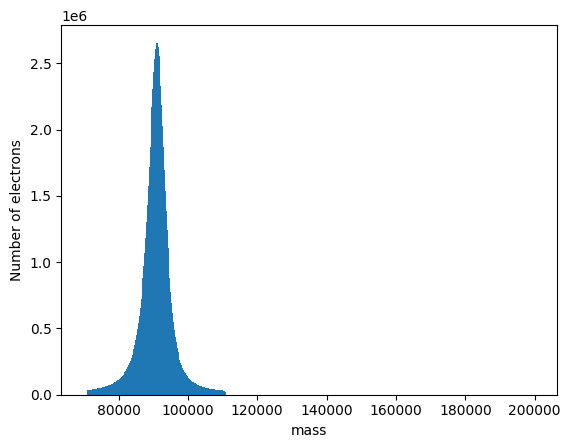

In [21]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["m_l1l2"][mask]), bins=500, range=(7*1e4,2*1e5))
plt.xlabel('mass')
plt.ylabel('Number of electrons')
plt.show()
plt.show()

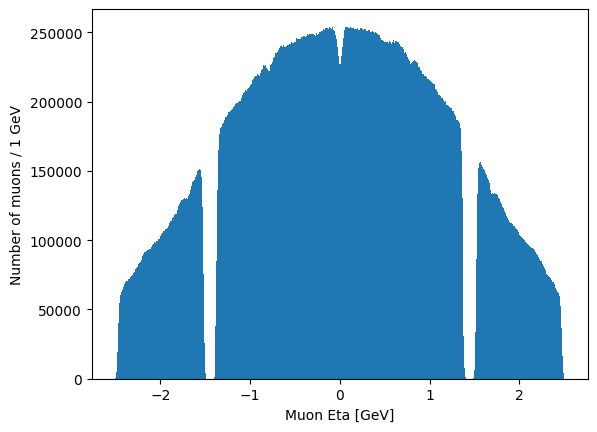

In [8]:
import awkward as ak
import matplotlib.pyplot as plt
plt.hist((branches["l1_eta"]), bins=500)
plt.xlabel('Muon Eta [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()
plt.show()

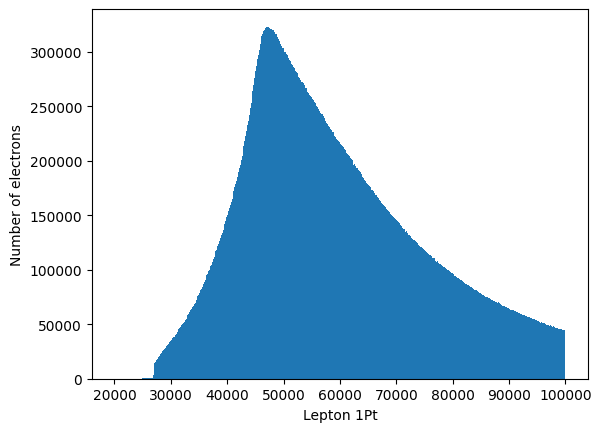

In [18]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["l1_pt"][mask]), bins=500, range=(20e3, 100e3))
plt.xlabel('Lepton 1Pt')
plt.ylabel('Number of electrons')
plt.show()
plt.show()


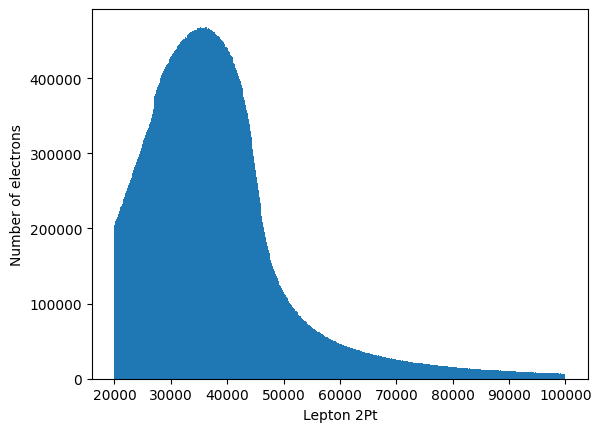

In [21]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["l2_pt"][mask]), bins=500, range=(20000, 100000))
plt.xlabel('Lepton 2Pt')
plt.ylabel('Number of electrons')
plt.show()
plt.show()

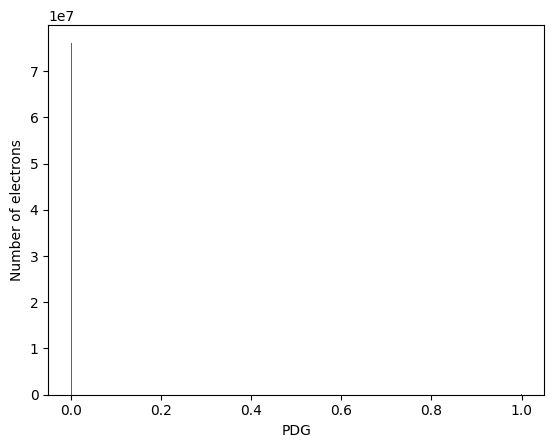

In [33]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["same_charge"][mask]), bins=500)
plt.xlabel('PDG')
plt.ylabel('Number of electrons')
plt.show()
plt.show()

In [11]:
import numpy as np
vals, counts = np.unique(branches["l1_isQMisID"], return_counts=True)
print(vals, counts)

l1_mask = np.array(branches["l1_isQMisID"]) > 0
l2_mask = np.array(branches["l2_isQMisID"]) > 0

print("l1 QMisID count:", np.sum(l1_mask))
print("l2 QMisID count:", np.sum(l2_mask))
print("total QmisID:", np.sum(l1_mask)+np.sum(l2_mask))
print("same charge total:", np.sum(branches["same_charge"]))
print("opposite charge total:", np.sum(branches["opposite_charge"]))

N = 15   
idx = np.where(branches["same_charge"]==1)[0][:N]
for i in idx:
    print(i, branches["l1_pdg"][i], branches["l2_pdg"][i])

ch1_mask = np.array(branches["l1_pdg"]) > 0
ch2_mask = np.array(branches["l2_pdg"]) > 0

print("l1 + charge", np.sum(ch1_mask))
print("l2 + charge", np.sum(ch2_mask))

[0, 1] [82250838, 117662]
l1 QMisID count: 117662
l2 QMisID count: 34513
total QmisID: 152175
same charge total: 175431
opposite charge total: 82193069
997 -11 -11
1199 -11 -11
1418 -11 -11
2421 -11 -11
2645 -11 -11
3103 11 11
3797 11 11
4645 -11 -11
4771 11 11
5594 11 11
5871 11 11
6237 -11 -11
6802 -11 -11
7620 -11 -11
7674 11 11
l1 + charge 41355142
l2 + charge 41007453
